In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
googl = pd.read_csv('/kaggle/input/big-tech-stock-prices/GOOGL.csv')
tsla = pd.read_csv('/kaggle/input/big-tech-stock-prices/TSLA.csv')
msft = pd.read_csv('/kaggle/input/big-tech-stock-prices/MSFT.csv')
csco = pd.read_csv('/kaggle/input/big-tech-stock-prices/CSCO.csv')
aapl = pd.read_csv('/kaggle/input/big-tech-stock-prices/AAPL.csv')
orcl = pd.read_csv('/kaggle/input/big-tech-stock-prices/ORCL.csv')
nvda = pd.read_csv('/kaggle/input/big-tech-stock-prices/NVDA.csv')
nflx = pd.read_csv('/kaggle/input/big-tech-stock-prices/NFLX.csv')
amzn = pd.read_csv('/kaggle/input/big-tech-stock-prices/AMZN.csv')
adbe = pd.read_csv('/kaggle/input/big-tech-stock-prices/ADBE.csv')
crm = pd.read_csv('/kaggle/input/big-tech-stock-prices/CRM.csv')
intc = pd.read_csv('/kaggle/input/big-tech-stock-prices/INTC.csv')
ibm = pd.read_csv('/kaggle/input/big-tech-stock-prices/IBM.csv')
meta = pd.read_csv('/kaggle/input/big-tech-stock-prices/META.csv')


# # to use this offline you can download the data from 
# # https://www.kaggle.com/datasets/evangower/big-tech-stock-prices?resource=download
# # into a folder called "big-tech-stock-prices"
# googl = pd.read_csv('big-tech-stock-prices/GOOGL.csv')
# tsla = pd.read_csv('big-tech-stock-prices/TSLA.csv')
# msft = pd.read_csv('big-tech-stock-prices/MSFT.csv')
# csco = pd.read_csv('big-tech-stock-prices/CSCO.csv')
# aapl = pd.read_csv('big-tech-stock-prices/AAPL.csv')
# orcl = pd.read_csv('big-tech-stock-prices/ORCL.csv')
# nvda = pd.read_csv('big-tech-stock-prices/NVDA.csv')
# nflx = pd.read_csv('big-tech-stock-prices/NFLX.csv')
# amzn = pd.read_csv('big-tech-stock-prices/AMZN.csv')
# adbe = pd.read_csv('big-tech-stock-prices/ADBE.csv')
# crm = pd.read_csv('big-tech-stock-prices/CRM.csv')
# intc = pd.read_csv('big-tech-stock-prices/INTC.csv')
# ibm = pd.read_csv('big-tech-stock-prices/IBM.csv')
# meta = pd.read_csv('big-tech-stock-prices/META.csv')

In [3]:
googl.set_index('Date',inplace=True)
googl = googl.loc['2013-01-01':'2022-12-31']
tsla.set_index('Date',inplace=True)
tsla = tsla.loc['2013-01-01':'2022-12-31']
msft.set_index('Date',inplace=True)
msft = msft.loc['2013-01-01':'2022-12-31']
csco.set_index('Date',inplace=True)
csco = csco.loc['2013-01-01':'2022-12-31']
aapl.set_index('Date',inplace=True)
aapl = aapl.loc['2013-01-01':'2022-12-31']
orcl.set_index('Date',inplace=True)
orcl = orcl.loc['2013-01-01':'2022-12-31']
nvda.set_index('Date',inplace=True)
nvda = nvda.loc['2013-01-01':'2022-12-31']
nflx.set_index('Date',inplace=True)
nflx = nflx.loc['2013-01-01':'2022-12-31']
amzn.set_index('Date',inplace=True)
amzn = amzn.loc['2013-01-01':'2022-12-31']
adbe.set_index('Date',inplace=True)
adbe = adbe.loc['2013-01-01':'2022-12-31']
crm.set_index('Date',inplace=True)
crm = crm.loc['2013-01-01':'2022-12-31']
intc.set_index('Date',inplace=True)
intc = intc.loc['2013-01-01':'2022-12-31']
ibm.set_index('Date',inplace=True)
ibm = ibm.loc['2013-01-01':'2022-12-31']
meta.set_index('Date',inplace=True)
meta = meta.loc['2013-01-01':'2022-12-31']

Create a list of ticker symbols as strings:

In [4]:
tickers = ['GOOGL','TSLA','MSFT','CSCO','AAPL','ORCL','NVDA','NFLX','AMZN','ADBE','CRM','INTC','IBM','META']

Let's concatenate the dataframes above into one single dataframe called big_tech_stocks.

In [5]:
big_tech_stocks = pd.concat([googl,tsla,msft,csco,aapl,orcl,nvda,nflx,amzn,adbe,crm,intc,ibm,meta],axis=1,keys=tickers)

In [6]:
big_tech_stocks.head() 

GOOGL                                              \
                 Open       High        Low      Close  Adj Close   
Date                                                                
2013-01-02  18.003504  18.193193  17.931683  18.099348  18.099348   
2013-01-03  18.141392  18.316566  18.036036  18.109859  18.109859   
2013-01-04  18.251753  18.555305  18.210211  18.467718  18.467718   
2013-01-07  18.404655  18.503002  18.282784  18.387136  18.387136   
2013-01-08  18.406906  18.425926  18.128880  18.350851  18.350851   

                             TSLA                                ...  \
                 Volume      Open      High       Low     Close  ...   
Date                                                             ...   
2013-01-02  101550348.0  2.333333  2.363333  2.314000  2.357333  ...   
2013-01-03   92635272.0  2.345333  2.363333  2.316667  2.318000  ...   
2013-01-04  110429460.0  2.320000  2.320000  2.261333  2.293333  ...   
2013-01-07   66161772.0  2.320000  2.320000  2.260000  2.289333  ...   
2013-01-08   66976956.0  2.300000  2.300000  2.207333  2.245333  ...   

                   IBM                                          META  \
                   Low       Close   Adj Close     Volume       Open   
Date                                                                   
2013-01-02  185.277252  187.715103  127.031883  4428869.0  27.440001   
2013-01-03  185.889099  186.682602  126.333130  3812356.0  27.879999   
2013-01-04  184.302109  185.458893  125.505020  3535689.0  28.010000   
2013-01-07  183.881454  184.646271  124.955055  2993966.0  28.690001   
2013-01-08  183.173996  184.388138  124.780418  3166137.0  29.510000   

                                                                  
                 High        Low      Close  Adj Close    Volume  
Date                                                              
2013-01-02  28.180000  27.420000  28.000000  28.000000  69846400  
2013-01-03  28.469999  27.590000  27.770000  27.770000  63140600  
2013-01-04  28.930000  27.830000  28.760000  28.760000  72715400  
2013-01-07  29.790001  28.650000  29.420000  29.420000  83781800  
2013-01-08  29.600000  28.860001  29.059999  29.059999  45871300  

[5 rows x 84 columns]

In [7]:
big_tech_stocks.columns.names = ['Tech Ticker','Stock Info']

In [8]:
big_tech_stocks.head()

Tech Ticker      GOOGL                                              \
Stock Info        Open       High        Low      Close  Adj Close   
Date                                                                 
2013-01-02   18.003504  18.193193  17.931683  18.099348  18.099348   
2013-01-03   18.141392  18.316566  18.036036  18.109859  18.109859   
2013-01-04   18.251753  18.555305  18.210211  18.467718  18.467718   
2013-01-07   18.404655  18.503002  18.282784  18.387136  18.387136   
2013-01-08   18.406906  18.425926  18.128880  18.350851  18.350851   

Tech Ticker                   TSLA                                ...  \
Stock Info        Volume      Open      High       Low     Close  ...   
Date                                                              ...   
2013-01-02   101550348.0  2.333333  2.363333  2.314000  2.357333  ...   
2013-01-03    92635272.0  2.345333  2.363333  2.316667  2.318000  ...   
2013-01-04   110429460.0  2.320000  2.320000  2.261333  2.293333  ...   
2013-01-07    66161772.0  2.320000  2.320000  2.260000  2.289333  ...   
2013-01-08    66976956.0  2.300000  2.300000  2.207333  2.245333  ...   

Tech Ticker         IBM                                          META  \
Stock Info          Low       Close   Adj Close     Volume       Open   
Date                                                                    
2013-01-02   185.277252  187.715103  127.031883  4428869.0  27.440001   
2013-01-03   185.889099  186.682602  126.333130  3812356.0  27.879999   
2013-01-04   184.302109  185.458893  125.505020  3535689.0  28.010000   
2013-01-07   183.881454  184.646271  124.955055  2993966.0  28.690001   
2013-01-08   183.173996  184.388138  124.780418  3166137.0  29.510000   

Tech Ticker                                                        
Stock Info        High        Low      Close  Adj Close    Volume  
Date                                                               
2013-01-02   28.180000  27.420000  28.000000  28.000000  69846400  
2013-01-03   28.469999  27.590000  27.770000  27.770000  63140600  
2013-01-04   28.930000  27.830000  28.760000  28.760000  72715400  
2013-01-07   29.790001  28.650000  29.420000  29.420000  83781800  
2013-01-08   29.600000  28.860001  29.059999  29.059999  45871300  

[5 rows x 84 columns]

What's the highest closing price for each big tech stock from 2013?

In [9]:
big_tech_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Tech Ticker
GOOGL    149.838501
TSLA     409.970001
MSFT     343.109985
CSCO      63.959999
AAPL     182.009995
ORCL     103.650002
NVDA     333.760010
NFLX     691.690002
AMZN     186.570496
ADBE     688.369995
CRM      309.959991
INTC      68.470001
IBM      206.309753
META     382.179993
dtype: float64

Sort in order from highest to lowest:

In [10]:
big_tech_stocks.xs(key='Close',axis=1,level='Stock Info').max().sort_values(ascending=False)

Tech Ticker
NFLX     691.690002
ADBE     688.369995
TSLA     409.970001
META     382.179993
MSFT     343.109985
NVDA     333.760010
CRM      309.959991
IBM      206.309753
AMZN     186.570496
AAPL     182.009995
GOOGL    149.838501
ORCL     103.650002
INTC      68.470001
CSCO      63.959999
dtype: float64

Here's a For Loop version:

In [11]:
for tech in tickers:
    print(tech,big_tech_stocks[tech]['Close'].max())

GOOGL 149.838501
TSLA 409.970001
MSFT 343.109985
CSCO 63.959999
AAPL 182.009995
ORCL 103.650002
NVDA 333.76001
NFLX 691.690002
AMZN 186.570496
ADBE 688.369995
CRM 309.959991
INTC 68.470001
IBM 206.309753
META 382.179993


Let's see which big tech stock had the best returns by using Pandas pct_change() method on the Close column.

In [12]:
big_tech_stocks['AAPL']['Close'].pct_change()

Date
2013-01-02         NaN
2013-01-03   -0.012622
2013-01-04   -0.027855
2013-01-07   -0.005882
2013-01-08    0.002691
                ...   
2022-12-23   -0.002798
2022-12-27   -0.013878
2022-12-28   -0.030685
2022-12-29    0.028324
2022-12-30    0.000000
Name: Close, Length: 2518, dtype: float64

In [13]:
stock_gains = pd.DataFrame() #create an empty dataframe so we can fill it in with percent changes

In [14]:
for tech in tickers:
    stock_gains[tech+' Return'] = big_tech_stocks[tech]['Close'].pct_change()

In [15]:
stock_gains[1:].head()

,GOOGL Return,TSLA Return,MSFT Return,CSCO Return,AAPL Return,ORCL Return,NVDA Return,NFLX Return,AMZN Return,ADBE Return,CRM Return,INTC Return,IBM Return,META Return
Date,,,,,,,,,,,,,,
2013-01-03,0.000581,-0.016685,-0.013396,0.005408,-0.012622,-0.010954,0.000786,0.049777,0.004547,-0.015389,-0.014372,-0.002806,-0.005500,-0.008214
2013-01-04,0.019760,-0.010642,-0.018716,0.001467,-0.027855,0.008744,0.032993,-0.006315,0.002592,0.010066,0.005335,-0.007505,-0.006555,0.035650
2013-01-07,-0.004363,-0.001744,-0.001870,-0.009277,-0.005882,-0.005201,-0.028897,0.033549,0.035925,-0.004983,-0.003714,0.004253,-0.004382,0.022949
2013-01-08,-0.001973,-0.019220,-0.005245,0.000986,0.002691,0.000290,-0.021926,-0.020565,-0.007748,0.005271,0.005859,-0.007529,-0.001398,-0.012237
2013-01-09,0.006573,-0.001187,0.005650,-0.000492,-0.015629,0.000581,-0.022418,-0.012865,-0.000113,0.013634,0.010943,0.017070,-0.002852,0.052650


In [16]:
stock_gains.min()

GOOGL Return   -0.116341
TSLA Return    -0.210628
MSFT Return    -0.147390
CSCO Return    -0.137304
AAPL Return    -0.128647
ORCL Return    -0.110018
NVDA Return    -0.187559
NFLX Return    -0.351166
AMZN Return    -0.140494
ADBE Return    -0.167932
CRM Return     -0.158885
INTC Return    -0.180415
IBM Return     -0.128507
META Return    -0.263901
dtype: float64

When did big tech stocks lose the most in a decade? Most are in 2020 during the pandemic and 2022, just before mass layoffs.

In [17]:
stock_gains.idxmin()

GOOGL Return    2020-03-16
TSLA Return     2020-09-08
MSFT Return     2020-03-16
CSCO Return     2022-05-19
AAPL Return     2020-03-16
ORCL Return     2020-03-12
NVDA Return     2018-11-16
NFLX Return     2022-04-20
AMZN Return     2022-04-29
ADBE Return     2022-09-15
CRM Return      2020-03-16
INTC Return     2020-03-16
IBM Return      2020-03-12
META Return     2022-02-03
dtype: object

Which big tech stock was the riskiest in the last decade in terms of biggest swings in ups and down? Let's find out through the Standard Deviation:

In [18]:
stock_gains.std()

GOOGL Return    0.017055
TSLA Return     0.036019
MSFT Return     0.017041
CSCO Return     0.015991
AAPL Return     0.018317
ORCL Return     0.016117
NVDA Return     0.027891
NFLX Return     0.030084
AMZN Return     0.020543
ADBE Return     0.019859
CRM Return      0.021964
INTC Return     0.019425
IBM Return      0.014861
META Return     0.024007
dtype: float64

In [19]:
stock_gains.std().sort_values(ascending=False)

TSLA Return     0.036019
NFLX Return     0.030084
NVDA Return     0.027891
META Return     0.024007
CRM Return      0.021964
AMZN Return     0.020543
ADBE Return     0.019859
INTC Return     0.019425
AAPL Return     0.018317
GOOGL Return    0.017055
MSFT Return     0.017041
ORCL Return     0.016117
CSCO Return     0.015991
IBM Return      0.014861
dtype: float64

How about the riskiest in the past year (2022)? Netflix, Tesla, Meta, and Amazon are on the news a lot these days, presumably because of mass layoffs (which is a lagging indicator. Normally the stock market reacts first.)

In [20]:
stock_gains.loc['2022-01-01':'2022-12-31'].std().sort_values(ascending=False)

NFLX Return     0.044126
TSLA Return     0.041992
META Return     0.040478
NVDA Return     0.039820
AMZN Return     0.031546
CRM Return      0.029747
ADBE Return     0.028386
GOOGL Return    0.024348
INTC Return     0.024108
AAPL Return     0.022485
MSFT Return     0.022263
ORCL Return     0.019238
CSCO Return     0.018479
IBM Return      0.015266
dtype: float64

Let's look at the distribution of Netflix's stock returns in 2022...

<AxesSubplot:xlabel='NFLX Return', ylabel='Count'>

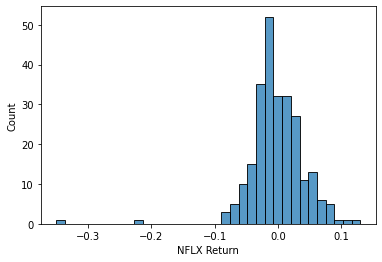

In [21]:
import seaborn as sns
sns.histplot(stock_gains.loc['2022-01-01':'2022-12-31']['NFLX Return'])

<AxesSubplot:xlabel='AMZN Return', ylabel='Count'>

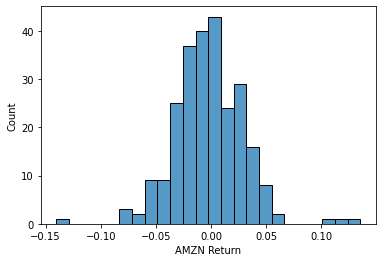

In [22]:
# curious to see Amazon's
sns.histplot(stock_gains.loc['2022-01-01':'2022-12-31']['AMZN Return'])

<AxesSubplot:xlabel='META Return', ylabel='Count'>

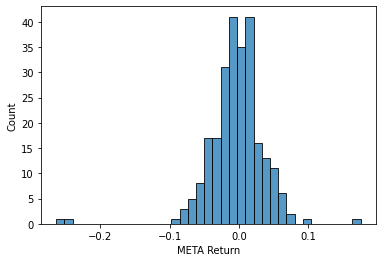

In [23]:
sns.histplot(stock_gains.loc['2022-01-01':'2022-12-31']['META Return'])

### More visualizations and imports

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
import plotly

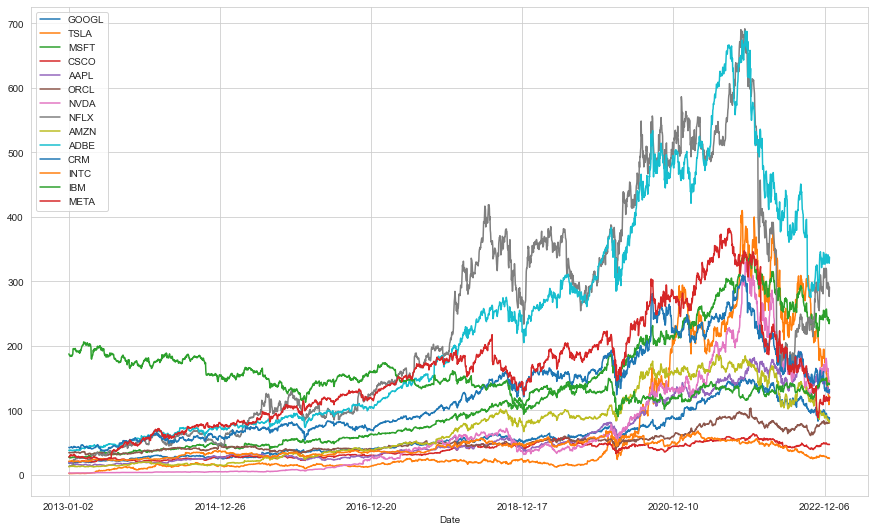

In [25]:
for tech in tickers:
    big_tech_stocks[tech]['Close'].plot(figsize=(15,9),label=tech)
plt.legend()

In [26]:
big_tech_stocks.xs(key='Close',axis=1,level='Stock Info')

Tech Ticker,GOOGL,TSLA,MSFT,CSCO,AAPL,ORCL,NVDA,NFLX,AMZN,ADBE,CRM,INTC,IBM,META
Date,,,,,,,,,,,,,,
2013-01-02,18.099348,2.357333,27.620001,20.340000,19.608213,34.689999,3.180000,13.144286,12.865500,38.340000,42.792500,21.379999,187.715103,28.000000
2013-01-03,18.109859,2.318000,27.250000,20.450001,19.360714,34.310001,3.182500,13.798571,12.924000,37.750000,42.177502,21.320000,186.682602,27.770000
2013-01-04,18.467718,2.293333,26.740000,20.480000,18.821428,34.610001,3.287500,13.711429,12.957500,38.130001,42.402500,21.160000,185.458893,28.760000
2013-01-07,18.387136,2.289333,26.690001,20.290001,18.710714,34.430000,3.192500,14.171429,13.423000,37.939999,42.244999,21.250000,184.646271,29.420000
2013-01-08,18.350851,2.245333,26.549999,20.309999,18.761070,34.439999,3.122500,13.880000,13.319000,38.139999,42.492500,21.090000,184.388138,29.059999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,89.230003,123.150002,238.729996,47.480000,131.860001,80.849998,152.059998,294.959991,85.250000,338.450012,129.440002,26.090000,141.649994,118.040001
2022-12-27,87.389999,109.099998,236.960007,47.529999,130.029999,80.980003,141.210007,284.170013,83.040001,335.089996,130.660004,25.940001,142.419998,116.879997
2022-12-28,86.019997,112.709999,234.529999,47.070000,126.040001,80.330002,140.360001,276.880005,81.820000,328.329987,128.470001,25.540001,140.020004,115.620003


In [27]:
big_tech_stocks.xs(key='Close',axis=1,level='Stock Info').tail()

Tech Ticker,GOOGL,TSLA,MSFT,CSCO,AAPL,ORCL,NVDA,NFLX,AMZN,ADBE,CRM,INTC,IBM,META
Date,,,,,,,,,,,,,,
2022-12-23,89.230003,123.150002,238.729996,47.480000,131.860001,80.849998,152.059998,294.959991,85.250000,338.450012,129.440002,26.090000,141.649994,118.040001
2022-12-27,87.389999,109.099998,236.960007,47.529999,130.029999,80.980003,141.210007,284.170013,83.040001,335.089996,130.660004,25.940001,142.419998,116.879997
2022-12-28,86.019997,112.709999,234.529999,47.070000,126.040001,80.330002,140.360001,276.880005,81.820000,328.329987,128.470001,25.540001,140.020004,115.620003
2022-12-29,88.449997,121.820000,241.009995,47.500000,129.610001,81.400002,146.029999,291.119995,84.180000,337.579987,132.539993,26.209999,141.059998,120.260002
2022-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.339996


<AxesSubplot:xlabel='Date'>

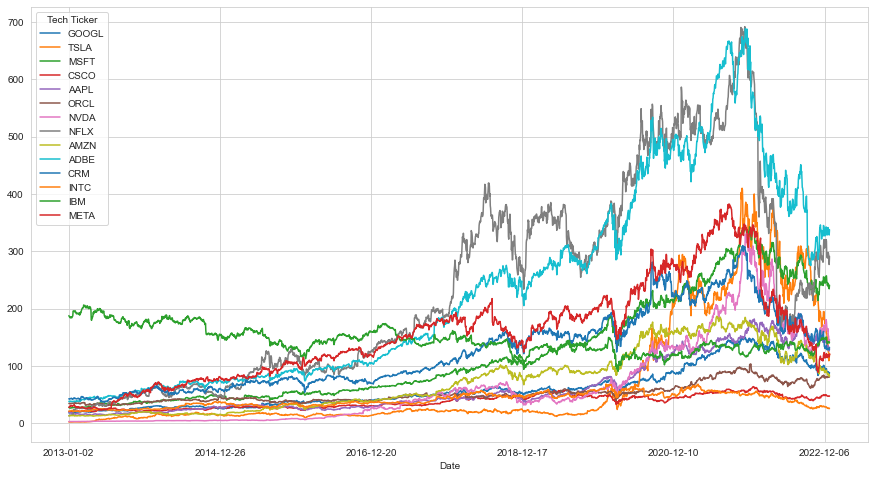

In [28]:
big_tech_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(15,8))

**Plotly**

In [1]:
#import plotly.graph_objects as go

# you need to link the dataframe to plotly in order to use iplot
# for that you need cufflinks
import cufflinks as cf
cf.go_offline()
# replaced "ix" (select by index/label) with "xs" (crossection)
big_tech_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

ModuleNotFoundError: No module named 'cufflinks'

### Moving Averages

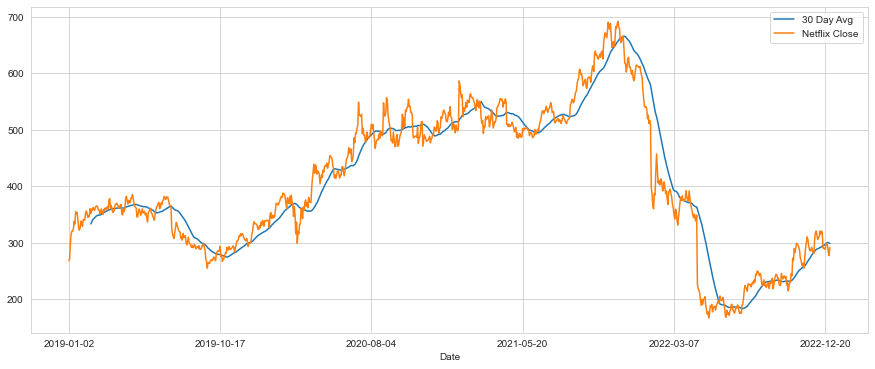

In [30]:
# this just worked as is
plt.figure(figsize=(15,6))
nflx['Close'].loc['2019-01-01':'2022-12-31'].rolling(window=30).mean().plot(label='30 Day Avg')
nflx['Close'].loc['2019-01-01':'2022-12-31'].plot(label='Netflix Close')
plt.legend()